# 人物の顔検出と性別認識

人物画像から顔を検知し、男女判別する。
- OpenCVのHarr-cascadeを使用して顔検出を行う
- 検出した顔部位をトリミングして、別途作成した男女判別モデルにより性別を判定する

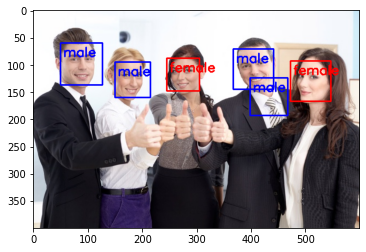

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model


# 学習済みの性別認識モデルをロード
model = load_model('./model_vgg16.h5')

# 顔検出モデルのインスタンス生成
cascade_path = "./haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(cascade_path)

# cv2のimread()で読み込んだデータは色指定順がBGRとなっているのでRGBに変更
img = cv2.imread('./data/test/persons.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = cascade.detectMultiScale(img_gray, 1.3, 5)
faces = cascade.detectMultiScale(img_gray, scaleFactor=1.3, minNeighbors=2, minSize=(30, 30))
for x, y, w, h in faces:
    # 調整
    # x = x - int(w * 0.1)
    # y = y - int(h * 0.1)
    # h = int(h * 1.2)
    # w = int(w * 1.2)

    # 顔部分を切り取る
    face_img = img[y:y+h, x:x+w]
    
    # ----- 性別判定 -----
    gender = None
    
    # 切り取り画像のサイズを変更
    face_img = cv2.resize(face_img, (50, 50))
    
    # イメージデータを4次元に変換
    pred = np.argmax(model.predict(face_img.reshape(-1, 50, 50, 3)))
    #pred = np.argmax(model.predict(np.array([face_img])), axis=1)
    
    # 男女判定し、結果を返す
    if pred == 0:
        gender = 'male'
    else:
        gender = 'female'
    
    # 矩形で顔を囲む
    if gender == 'female':
        color = (255, 0, 0)
    else:
        color = (0, 0, 255)
    
    # 顔部分を矩形で囲む
    img = cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
    img = cv2.putText(img, gender, (x+5, y+25),cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, thickness=2)

plt.imshow(img);